## Câu hỏi
**Đối với mỗi thể loại anime, Studio nào có sở trường sản xuất thể loại anime đó?**

**Ý nghĩa**: Một studio có kinh nghiệm và thành tích tốt trong một thể loại anime cụ thể sẽ cho ra các sản phẩm có chất lượng tốt hơn, góp phần đảm bảo được sự thành công của bộ anime đó. Việc biết được studio nào có sở trường trong thể loại nào sẽ giúp nhà sản xuất đưa ra quyết định phù hợp.

**Hướng giải quyết**: Ta tập trung vào thuộc tính Score để đánh giá độ 'sở trường' của một studio. Khó khăn ở chổ nếu chỉ dùng Score trung bình thì không ổn do số lượng anime mà studio sản xuất cũng sẽ ảnh hưởng đến kết quả, nên ở đây ta sẽ dùng giá trị **trung bình có trọng số** (sẽ giải thích ở phần sau)


---

## Cài đặt thư viện

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

Các đường dẫn:

In [27]:
HOME = os.getcwd()
DATASET_PATH = os.path.join(HOME, 'raw_animes_dataset')
ANIME_DATASET_2023 = os.path.join(DATASET_PATH, 'anime-dataset-2023.csv')
DATA_PREPROCESSING = os.path.join(HOME, 'Data Preprocessing')
CLEAN_ANIME_DATASET_2023 = os.path.join(DATA_PREPROCESSING, 'anime-data-preprocessing.csv')


print(f'Home: {HOME}')
print(f'Dataset Path: {DATASET_PATH}')
print(f'Anime Dataset 2023: {ANIME_DATASET_2023}')
print(f'Data Preprocessing: {DATA_PREPROCESSING}')
print(f'Clean Anime Dataset 2023: {CLEAN_ANIME_DATASET_2023}')

Home: e:\Final_Project_DataScienceProgramming
Dataset Path: e:\Final_Project_DataScienceProgramming\raw_animes_dataset
Anime Dataset 2023: e:\Final_Project_DataScienceProgramming\raw_animes_dataset\anime-dataset-2023.csv
Data Preprocessing: e:\Final_Project_DataScienceProgramming\Data Preprocessing
Clean Anime Dataset 2023: e:\Final_Project_DataScienceProgramming\Data Preprocessing\anime-data-preprocessing.csv


---

## Đọc dữ liệu 

In [28]:
df = pd.read_csv(CLEAN_ANIME_DATASET_2023)

In [29]:
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13834 non-null  object 
 1   Score              13834 non-null  float64
 2   Genres             13834 non-null  object 
 3   Synopsis           13834 non-null  object 
 4   Type               13834 non-null  object 
 5   Episodes           13834 non-null  float64
 6   Producers          13834 non-null  object 
 7   Studios            13834 non-null  object 
 8   Source             13834 non-null  object 
 9   Time per ep (Min)  13834 non-null  float64
 10  Rating             13834 non-null  object 
 11  Rank               13834 non-null  int64  
 12  Popularity         13834 non-null  int64  
 13  Favorites          13834 non-null  int64  
 14  Scored By          13834 non-null  int64  
 15  Members            13834 non-null  int64  
 16  Released date      138

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24.0,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,2009-04-05,2010-07-04
1,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,24.0,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24.0,PG-13 - Teens 13 or older,2,13,182964,1336233,2440369,2011-04-06,2011-09-14
2,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,13.0,"TV Tokyo, Aniplex, Dentsu, Shueisha",Pierrot,Manga,24.0,R - 17+ (violence & profanity),3,464,17999,213872,445198,2022-10-11,2022-12-27
3,Gintama°,9.06,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,51.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,24.0,PG-13 - Teens 13 or older,4,331,15947,237957,595767,2015-04-08,2016-03-30
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama",Seeking to restore humanity's diminishing hope...,TV,10.0,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23.0,R - 17+ (violence & profanity),5,24,55245,1471825,2104016,2019-04-29,2019-07-01


---

## Tiền xử lý dữ liệu

#### Trích ra những cột mà ta quan tâm trong bài này

In [30]:
df = df[['Name', 'Score', 'Genres', 'Studios', 'Released date']]
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           13834 non-null  object 
 1   Score          13834 non-null  float64
 2   Genres         13834 non-null  object 
 3   Studios        13834 non-null  object 
 4   Released date  13834 non-null  object 
dtypes: float64(1), object(4)
memory usage: 540.5+ KB
None


,Name,Score,Genres,Studios,Released date
0,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",Bones,2009-04-05
1,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",White Fox,2011-04-06
2,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy",Pierrot,2022-10-11
3,Gintama°,9.06,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,2015-04-08
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama",Wit Studio,2019-04-29


#### Xử lý thuộc tính 'Released date':
- Chuyển thuộc tính thành dạng datetime
- Chuyển 'Released date' thành 'Released year', chỉ giữ lại phần năm

In [31]:
df['Released date'] = pd.to_datetime(df['Released date'])
df['Released date'] = df['Released date'].dt.year
df.rename(columns={'Released date': 'Released year'}, inplace=True)

In [32]:
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           13834 non-null  object 
 1   Score          13834 non-null  float64
 2   Genres         13834 non-null  object 
 3   Studios        13834 non-null  object 
 4   Released year  13834 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 540.5+ KB
None


,Name,Score,Genres,Studios,Released year
0,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",Bones,2009
1,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",White Fox,2011
2,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy",Pierrot,2022
3,Gintama°,9.06,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,2015
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama",Wit Studio,2019


#### Kiểm tra các giá trị UNKNOWN còn lẫn trong cột 'Studios'

In [33]:
columns_to_check = ['Studios']

for column in columns_to_check:
    unknown_count = df[column].apply(lambda x: x.lower() == 'unknown').sum()
    print(f'Unknown count in {column}: {unknown_count}. Ratio: {unknown_count / len(df) * 100:.2f}%')

Unknown count in Studios: 2345. Ratio: 16.95%


Ở đây tỉ lệ UNKNOWN là 17.03%, ta sẽ xóa luôn các dòng có chứa UNKNOWN

In [34]:
df = df[df['Studios'].apply(lambda x: x.lower() != 'unknown')]

In [35]:
print(df.info())   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11489 entries, 0 to 13833
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           11489 non-null  object 
 1   Score          11489 non-null  float64
 2   Genres         11489 non-null  object 
 3   Studios        11489 non-null  object 
 4   Released year  11489 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 538.5+ KB
None


#### Chuyển hai cột thuộc tính 'Genres' và 'Studios' về đơn nhãn

In [36]:
# Biến dữ liệu thành list
df['Genres'] = df['Genres'].apply(lambda x: [name.strip() for name in x.split(',')])
df['Studios'] = df['Studios'].apply(lambda x: [name.strip() for name in x.split(',')])

# Dùng explode để tạo ra các hàng mới từ
df = df.explode('Genres')
df = df.explode('Studios')

df = df.reset_index(drop=True)

In [37]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27781 entries, 0 to 27780
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           27781 non-null  object 
 1   Score          27781 non-null  float64
 2   Genres         27781 non-null  object 
 3   Studios        27781 non-null  object 
 4   Released year  27781 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ MB
None


,Name,Score,Genres,Studios,Released year
0,Fullmetal Alchemist: Brotherhood,9.10,Action,Bones,2009
1,Fullmetal Alchemist: Brotherhood,9.10,Adventure,Bones,2009
2,Fullmetal Alchemist: Brotherhood,9.10,Drama,Bones,2009
3,Fullmetal Alchemist: Brotherhood,9.10,Fantasy,Bones,2009
4,Steins;Gate,9.07,Drama,White Fox,2011
5,Steins;Gate,9.07,Sci-Fi,White Fox,2011
6,Steins;Gate,9.07,Suspense,White Fox,2011
7,Bleach: Sennen Kessen-hen,9.07,Action,Pierrot,2022
8,Bleach: Sennen Kessen-hen,9.07,Adventure,Pierrot,2022
9,Bleach: Sennen Kessen-hen,9.07,Fantasy,Pierrot,2022


#### Lọc lấy dữ liệu của các bộ anime từ năm 2000 trờ về sau

Do ở đây chúng ta muốn tìm Studio sở trường của một bộ anime nhằm mục đích giao phó những bộ anime mới cho Studio thích hợp, ta sẽ chỉ xét các dữ liệu từ năm 2000 đổ về sau. Các dữ liệu cũ hơn khả năng cao đã không còn phản ánh đúng xu hướng hiện tại của ngành công nghiệp anime hiện nay.

In [38]:
df = df[df['Released year'] >= 2000]

---

## Khám phá dữ liệu - Trả lời câu hỏi (Phần nhận xét vẫn đang viết)

Ở đây ta sẽ dùng weighted mean score (giải thích)

In [39]:
# Ta group data theo Genres sau đó là Studios, sau đó tính mean của Score
grouped_df = df.groupby(['Genres', 'Studios'])['Score'].agg(mean_score='mean', film_count='size').reset_index()

grouped_df['weighted_mean_score'] = (grouped_df['mean_score'] * grouped_df['film_count']) / grouped_df['film_count'].sum()

grouped_df = grouped_df.sort_values(by='weighted_mean_score', ascending=False)

grouped_df

,Genres,Studios,mean_score,film_count,weighted_mean_score
2002,Fantasy,Toei Animation,6.951531,196,0.062843
315,Action,Sunrise,7.090988,172,0.056254
3039,Sci-Fi,Sunrise,7.006145,166,0.053642
333,Action,Toei Animation,7.004444,162,0.052337
976,Comedy,J.C.Staff,7.100513,156,0.051090
...,...,...,...,...,...
875,Comedy,Brio Animation,3.060000,1,0.000141
2857,Sci-Fi,Brio Animation,3.060000,1,0.000141
3069,Sci-Fi,Visual Flight,2.900000,1,0.000134
348,Action,Visual Flight,2.900000,1,0.000134


In [40]:
def drar_bar_chart(grouped_df, selected_genres=['Comedy', 'Action', 'Fantasy'], top_n=5):
    # Tạo figure với 3 subplots (chia thành 3 phần)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, genre in enumerate(selected_genres):
        genre_data = grouped_df[grouped_df['Genres'] == genre].nlargest(top_n, 'weighted_mean_score')
        sns.barplot(data=genre_data, x='weighted_mean_score', y='Studios', ax=axes[i], hue='Studios',  palette='viridis')
        axes[i].set_title(f'Top {top_n} Studios for {genre}')
        axes[i].set_xlabel('Weighted mean score')
        axes[i].set_ylabel('Studio')
        axes[i].set_xticks(axes[i].get_xticks()[::2])
        for spine in axes[i].spines.values():
            spine.set_visible(False)

    plt.tight_layout()
    plt.show()

Minh họa genre `Comedy`, `Action`, `Fantasy`

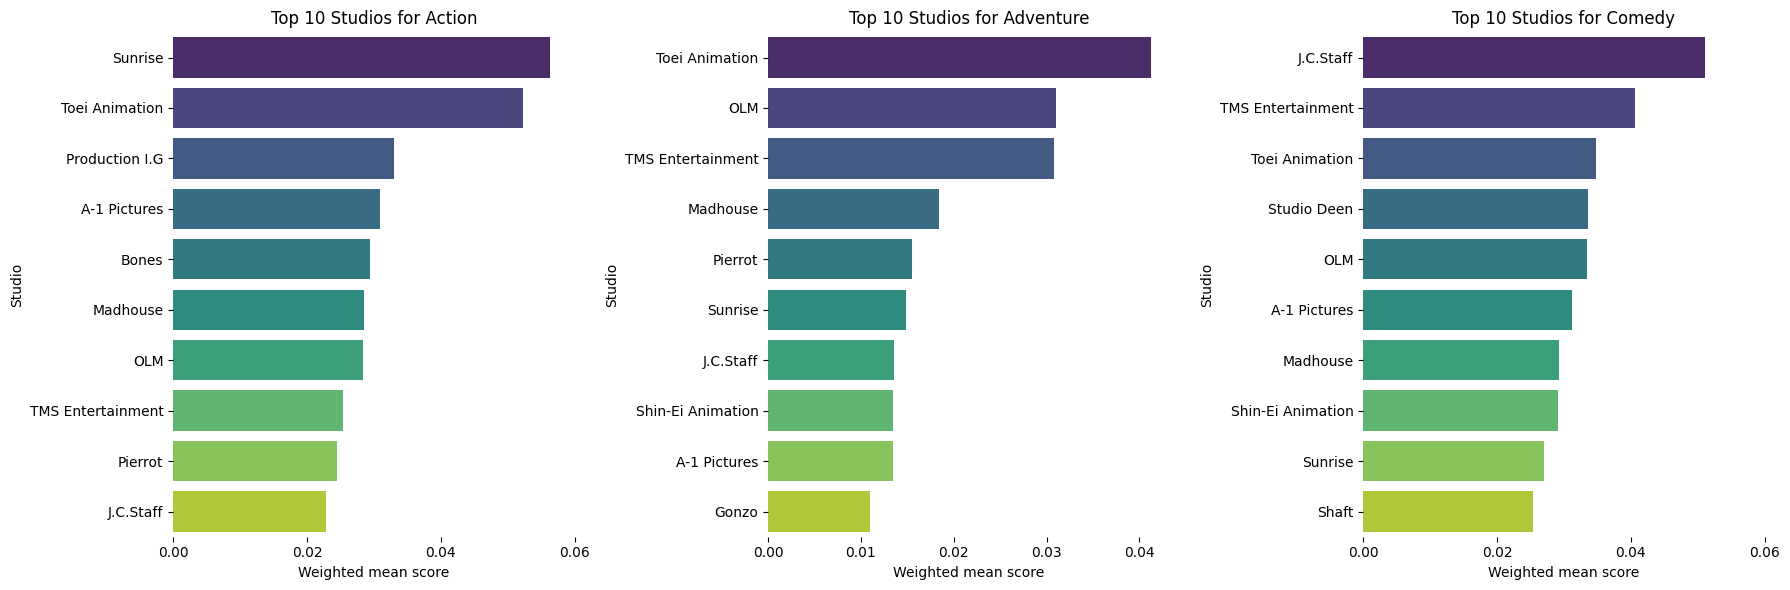

In [41]:
genres = ['Action', 'Adventure', 'Comedy']
drar_bar_chart(grouped_df, genres, 10)

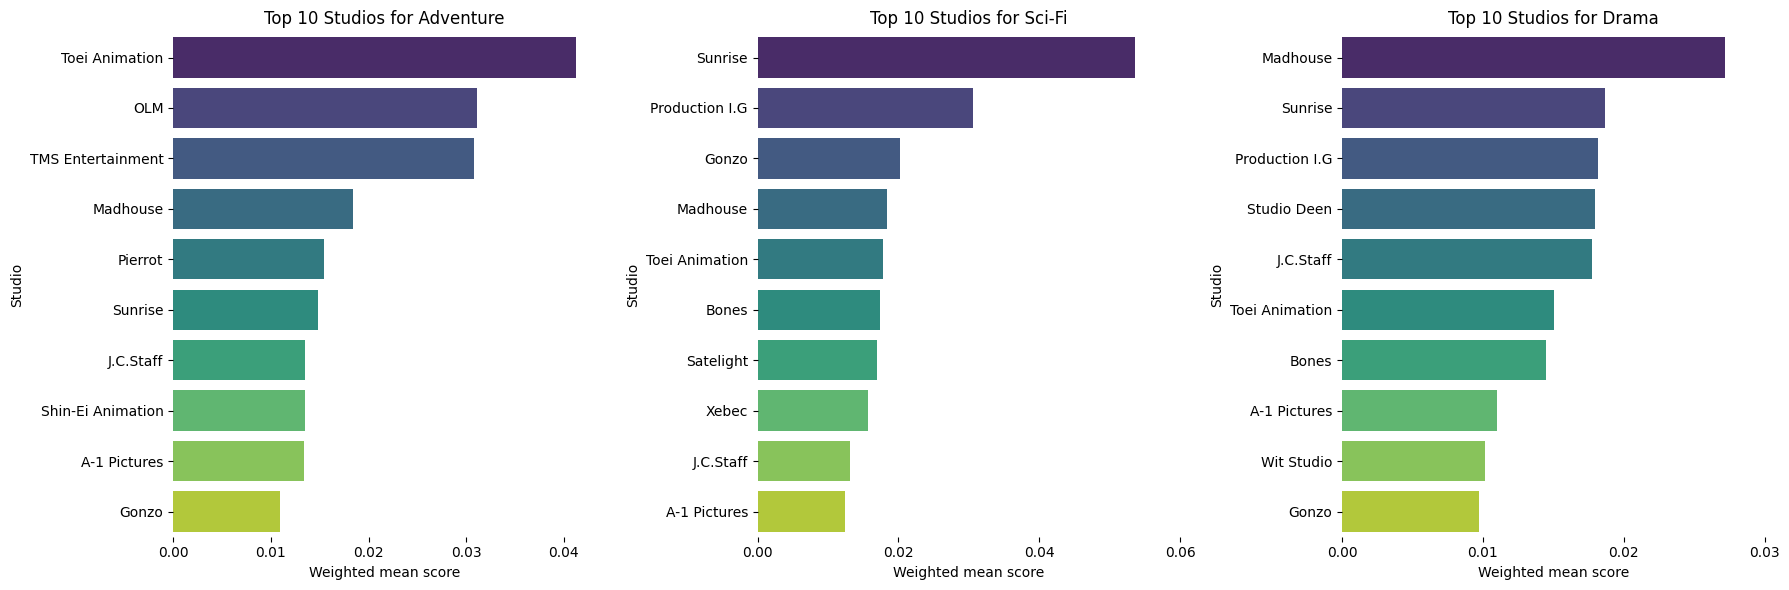

In [42]:
genres = ['Adventure', 'Sci-Fi', 'Drama']
drar_bar_chart(grouped_df, genres, 10)

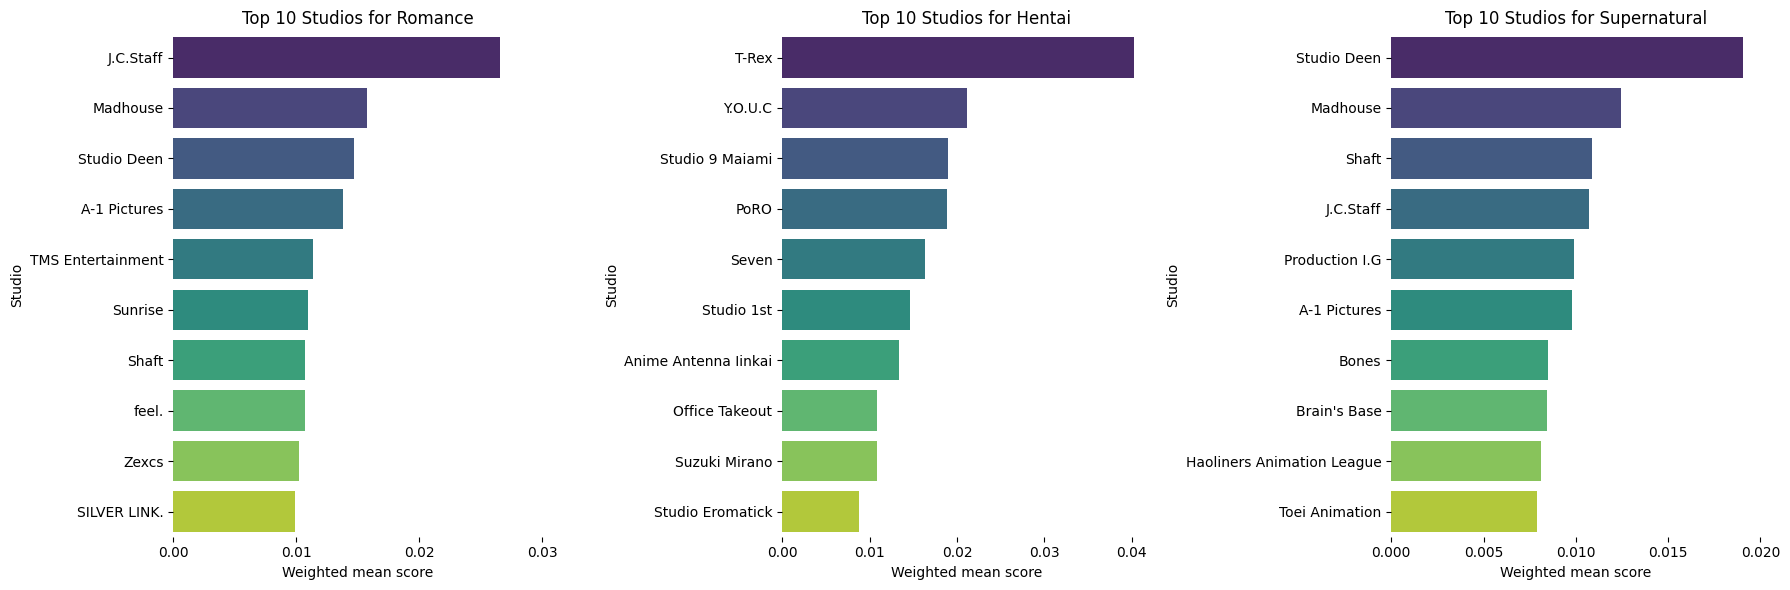

In [43]:
genres = ['Romance', 'Hentai', 'Supernatural']
drar_bar_chart(grouped_df, genres, 10)

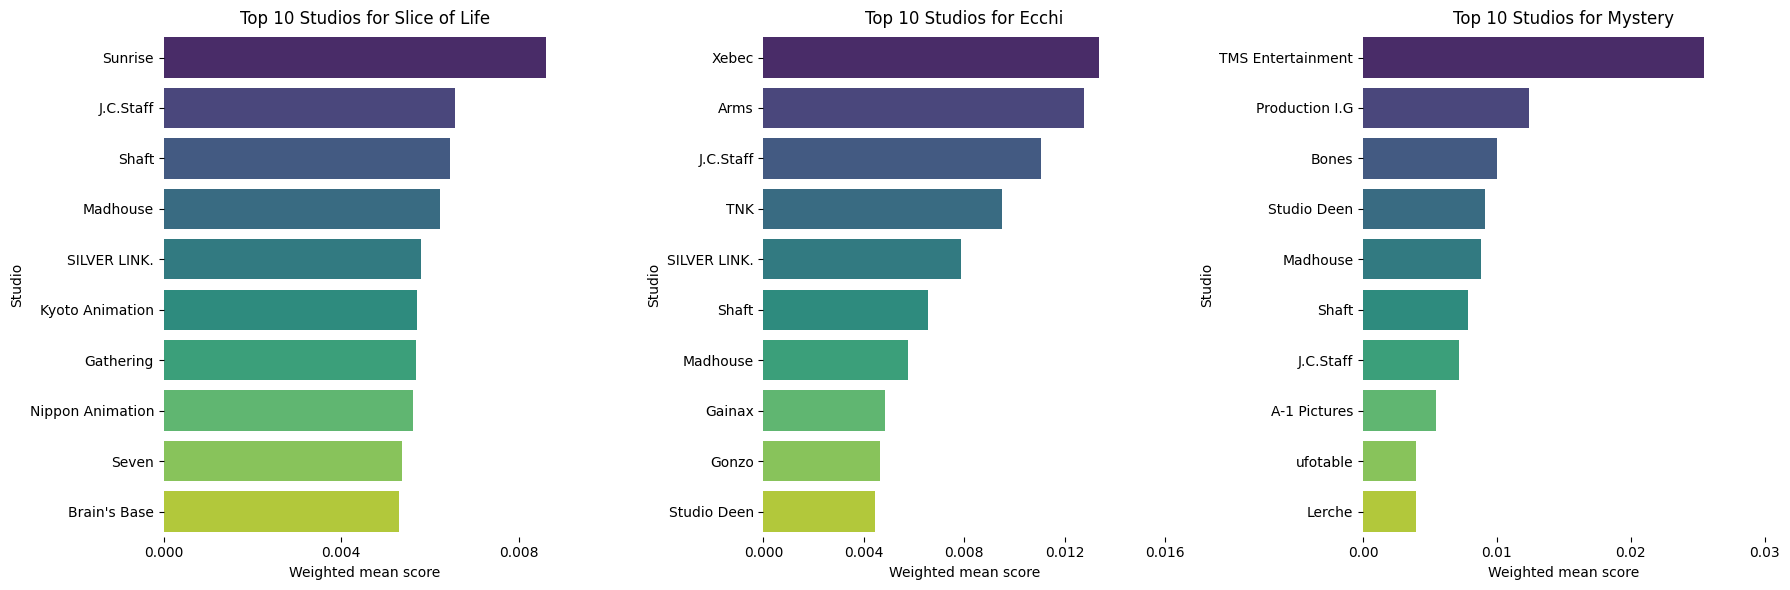

In [44]:
genres = ['Slice of Life', 'Ecchi', 'Mystery']
drar_bar_chart(grouped_df, genres, 10)

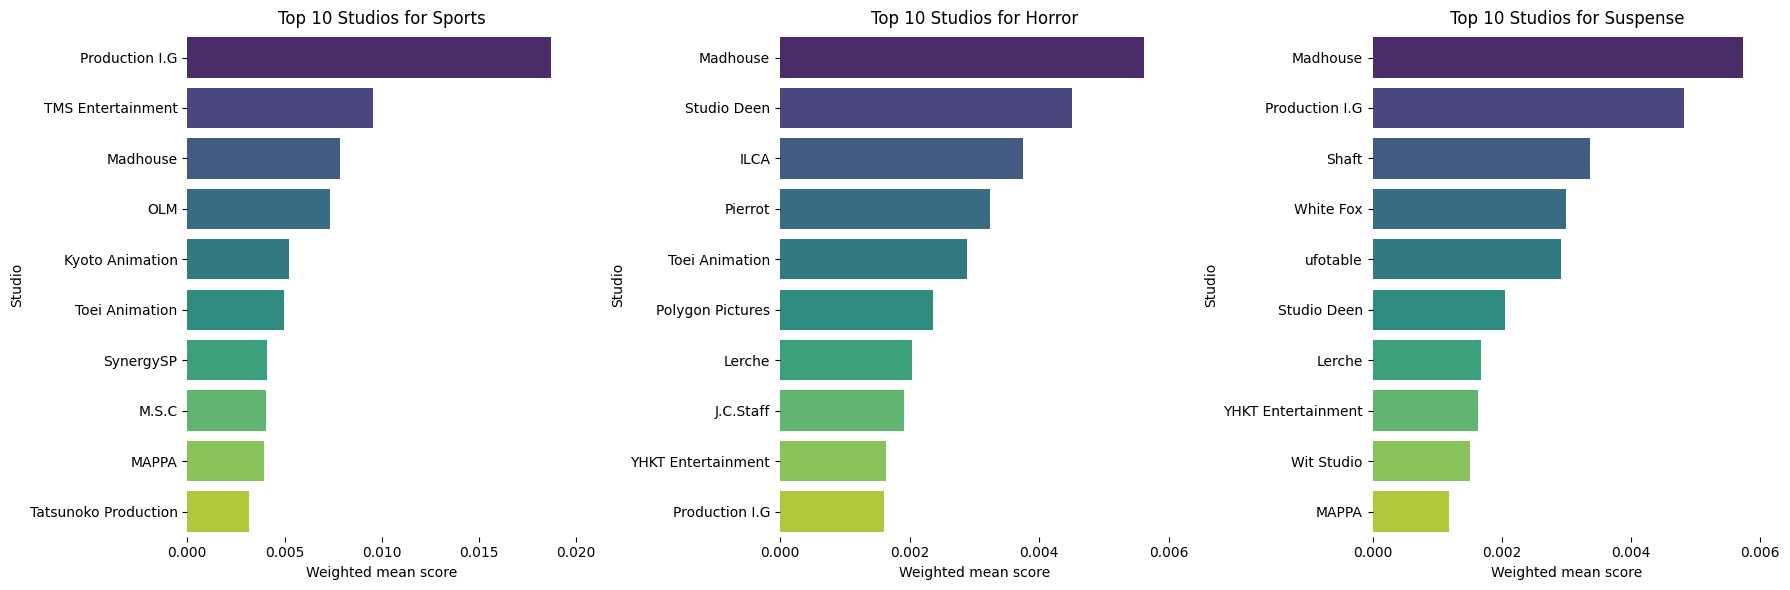

In [45]:
genres = ['Sports', 'Horror', 'Suspense']
drar_bar_chart(grouped_df, genres, 10)

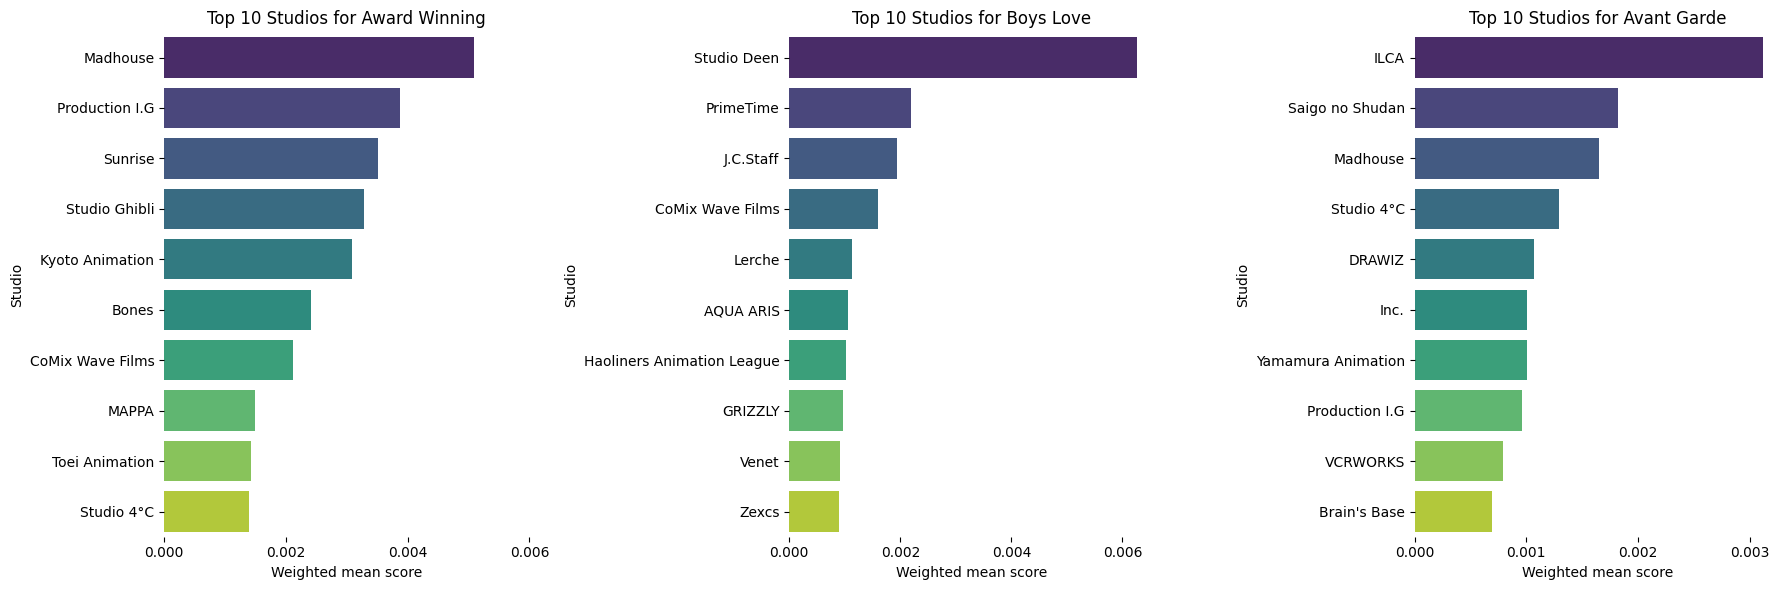

In [46]:
genres = ['Award Winning', 'Boys Love', 'Avant Garde']
drar_bar_chart(grouped_df, genres, 10)

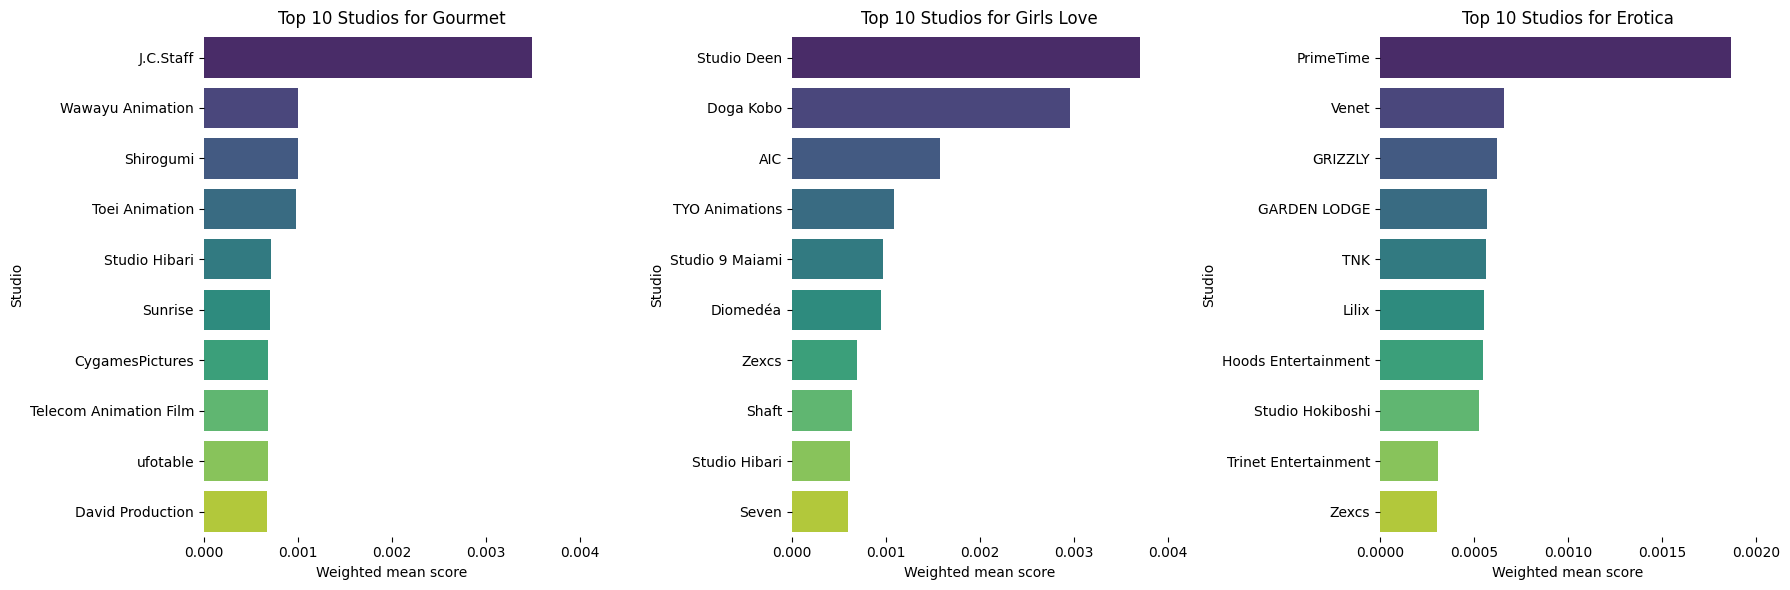

In [47]:
genres = ['Gourmet', 'Girls Love', 'Erotica']
drar_bar_chart(grouped_df, genres, 10)

Ngoài nhận xét riêng về từng thể loại, sẽ thêm phần phân tích xem studio nào đang dẫn đầu thị trường anime hiện tại.